In [20]:
import pandas as pd 
import numpy as np
from scipy.signal import argrelextrema

# Get the CSV data
filepath = '/Users/fatimayousuf/Downloads/RLC_Circuit.csv'

# Read the csv file and organize data into a pandas dataframe
df = pd.read_csv(filepath)
df.columns = ['t', 'v']
df = df.iloc[1:] # not sure why, by the first row is just (t=0, v=0), so we can get rid of that

# Separate time and voltage data into lists
t = df[df.columns[0]].to_list()
v = df[df.columns[1]].to_list()

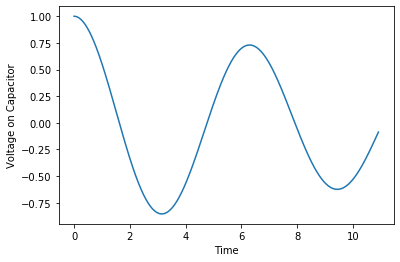

In [3]:
import matplotlib.pyplot as plt

# Plot the collected data
plt.plot(t, v)
plt.ylabel('Voltage on Capacitor')
plt.xlabel('Time')
plt.show()

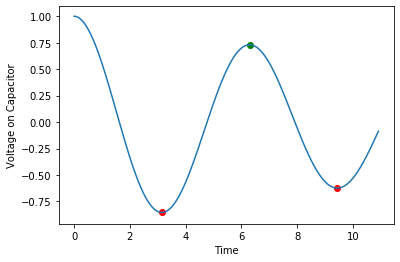

In [4]:
# Find local maxes and mins. Append results to the dataframe by creating "min" and "max" columns
df['min'] = df.v[(df.v.shift(1) > df.v) & (df.v.shift(-1) > df.v)]
df['max'] = df.v[(df.v.shift(1) < df.v) & (df.v.shift(-1) < df.v)]

# Plot results. Maxes are colored green and mins red.
plt.scatter(df['t'], df['min'], c='r')
plt.scatter(df['t'], df['max'], c='g')
plt.plot(t, v)
plt.ylabel('Voltage on Capacitor')
plt.xlabel('Time')
plt.show()

In [5]:
# Print the values of the points of attraction
local_mins = df[~df['min'].isnull()]
print("Local Mins: ")
print(local_mins[['t', 'v']])

local_maxes = df[~df['max'].isnull()]
print("\nLocal Maxes:")
print(local_maxes[['t', 'v']])

Local Mins: 
               t         v
314559  3.145523 -0.854468
943665  9.436583 -0.623860

Local Maxes:
               t         v
629112  6.291053  0.730115


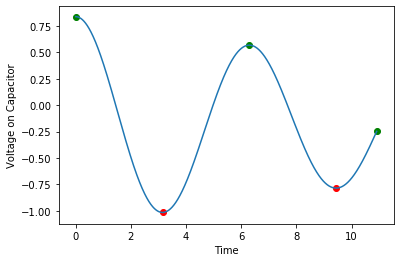

In [26]:
# Add noise to the data TODO
np.random.seed(1000)
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [len(df.v),1]) 

n=5 # number of points to be checked before and after 
# Find local peaks
df['min_noisy'] = df.iloc[argrelextrema(df.v.values, np.less_equal, order=n)[0]]['v']
df['max_noisy'] = df.iloc[argrelextrema(df.v.values, np.greater_equal, order=n)[0]]['v']

# Plot the collected data
plt.scatter(df['t'], df['min_noisy'], c='r')
plt.scatter(df['t'], df['max_noisy'], c='g')
plt.plot(t, v)
plt.ylabel('Voltage on Capacitor')
plt.xlabel('Time')
plt.show()